In [6]:
import pandas as pd

cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
# 讀取檔案
all_df = pd.read_csv("abalone.data", names=cols)
all_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
import numpy as np

# 把資料分為訓練資料與測試資料 85%訓練 15%測試
mask = np.random.rand(len(all_df)) < 0.85
train_df = all_df[mask]
test_df = all_df[~mask]
len(test_df)

643

In [8]:
from sklearn import preprocessing
from keras.utils import to_categorical


def feature_preprocessing(df: pd.DataFrame) -> tuple[np.ndarray, np.ndarray]:
    # 把那些不是數字的資料轉換成數字
    dic0 = {"M": 0, "F": 1, "I": 2}
    df["Sex"] = df["Sex"].map(dic0).astype(int)
    
    # 把資料分開成特徵與標籤
    nd_array = df.values
    labels = nd_array[:, 0]  # 標籤
    data = nd_array[:, 1:]  # 特徵
    
    # 特徵縮放成0~1之間
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    # OHE: one-hot encoding
    labels = to_categorical(labels)

    return scaled_data, labels


train_data, train_labels = feature_preprocessing(train_df)
test_data, test_labels = feature_preprocessing(test_df)
test_labels

C:\Users\AU712\AppData\Local\Temp\ipykernel_6320\2072333512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = df["Sex"].map(dic0).astype(int)
C:\Users\AU712\AppData\Local\Temp\ipykernel_6320\2072333512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = df["Sex"].map(dic0).astype(int)


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

model = Sequential()

# input_shape=(8,) 輸入有8個
model.add(Dense(512, activation=("sigmoid"), input_shape=(8,)))
model.add(Dropout(0.1))  # 隨機丟棄10%的神經元
model.add(Dense(256, activation=("sigmoid")))  # 隱藏層256個神經元
model.add(Dense(3, activation=("softmax")))  # 輸出層3個神經元
print(model.summary())

"""
隨機梯度下降並設定學習率為 0.01 以及動量為 0.9
學習率表示每次更新的幅度，動量表示前一次更新的幅度
"""
sgd = SGD(lr=0.01, momentum=0.9)
"""
不太確定categorical_crossentropy的意思
優化器用上面的sgd
用準確率來當評估指標
"""
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["acc"])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               4608      
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 dense_32 (Dense)            (None, 3)                 771       
                                                                 
Total params: 136,707
Trainable params: 136,707
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
"""
傳入訓練資料與標籤 驗證資料比例0.3 訓練300次 每次訓練30筆資料
但是不太懂為什麼上面已經設定85%訓練15%測試 這邊又給一次validation_split
上面已經自己分好了這邊再給一次驗證數據的比例 那到底會用我上面自己分好的比例還是用validation_split設定的比例
"""
history = model.fit(
    train_data, train_labels, validation_split=0.3, epochs=300, batch_size=30
)

Epoch 1/300
83/83 [==============================] - 0s 4ms/step - loss: 0.8999 - acc: 0.5289 - val_loss: 0.8799 - val_acc: 0.5269
Epoch 2/300
83/83 [==============================] - 0s 4ms/step - loss: 0.8980 - acc: 0.5326 - val_loss: 0.8919 - val_acc: 0.5250
Epoch 3/300
83/83 [==============================] - 0s 4ms/step - loss: 0.8998 - acc: 0.5334 - val_loss: 0.8833 - val_acc: 0.5287
Epoch 4/300
83/83 [==============================] - 0s 4ms/step - loss: 0.9005 - acc: 0.5164 - val_loss: 0.8808 - val_acc: 0.5231
Epoch 5/300
83/83 [==============================] - 0s 3ms/step - loss: 0.8934 - acc: 0.5317 - val_loss: 0.8796 - val_acc: 0.5212
Epoch 6/300
83/83 [==============================] - 0s 4ms/step - loss: 0.8987 - acc: 0.5297 - val_loss: 0.8881 - val_acc: 0.5287
Epoch 7/300
83/83 [==============================] - 0s 3ms/step - loss: 0.9006 - acc: 0.5281 - val_loss: 0.8793 - val_acc: 0.5231
Epoch 8/300
83/83 [==============================] - 0s 3ms/step - loss: 0.8959 - a

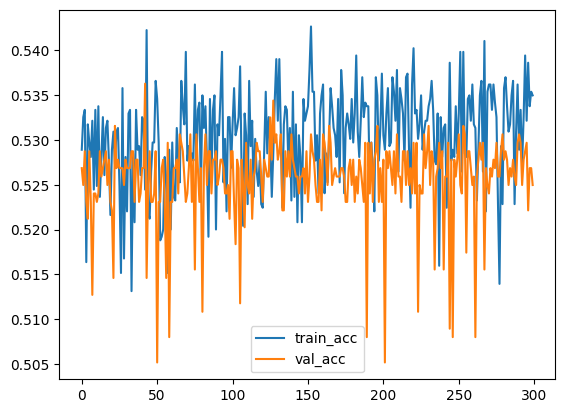

In [39]:
import matplotlib.pyplot as plt

# 輸出圖表
plt.plot(history.history["acc"], label="train_acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()

(1) 你覺得一個機器學習/深度學習重要的處理步驟有哪些？請說明這些步驟的細節。
數據的收集跟準備、訓練模型的設計、電腦性能
數據收集的話目前我只使用過UCI網站上面的測試資料，能做選擇的大概就是資料量多一點並且缺失少的資料集來訓練
訓練模型的設計的話現在還只會調整模型的層數跟每層神經元數量
電腦性能不好的話訓練就要花費很多時間

(2) 這些步驟為什麼對機器學習/深度學習來說很重要？
數據缺失太多或是樣本太少的話模型沒辦法有足夠的訓練去學習，所以就沒辦法訓練出好的模型

(3) 你覺得這些例子的神經網路模型建構還可以朝向什麼方向調整優化？
多收集高質量的數據、用更深的模型、調整參數數量

(4) 以目前老師公佈的流程與作法，除了上述的面向之外，還可以做什麼樣的調整？
層數越多好像前面要跑越久準確度才會開始上升、但是上升後好像會比原本精準度高一點、增加神經元數量的話每次訓練時間都會變長
所以我的想法是盡量堆層數、神經元還有資料量，在電腦性能足夠好的情況下應該可以訓練出好的模型
這個期中考學校電腦好像跑不太動、剛剛也試過用Colab可能是因為資料量太多所以也跑很慢訓練300次都要跑個2分鐘左右
考試時間也不長所以沒辦法做太多嘗試